# 言語処理100本ノック 2020 第４章

Reference: https://nlp100.github.io/ja/ch04.html

In [ ]:
! wget https://nlp100.github.io/data/neko.txt

In [ ]:
! mecab neko.txt -o neko.txt.mecab

In [60]:
import re
import numpy as np
import pandas as pd
import seaborn as sns

## 30. 形態素解析結果の読み込み

形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [36]:
with open("neko.txt.mecab", "r", encoding="utf-8") as fi:
    s_s = []
    s = []
    lines = fi.readlines()
    for line in lines:
        if re.match("^EOS", line):
            if len(s) != 0: s_s.append(s)
            s = []
        elif not re.match("^\u3000", line):
            word, info = line.strip("\n").split("\t")
            info_list = info.split(",")
            pos, pos1 = info_list[:2]
            if(len(info_list) > 6): base = info_list[6]
            else: base = ""
            s.append({"surface": word, "base":base, "pos":pos, "pos1":pos1})
s_s[:4]

[[{'base': '一', 'pos': '名詞', 'pos1': '数', 'surface': '一'}],
 [{'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞', 'surface': '吾輩'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': '猫', 'pos': '名詞', 'pos1': '一般', 'surface': '猫'},
  {'base': 'だ', 'pos': '助動詞', 'pos1': '*', 'surface': 'で'},
  {'base': 'ある', 'pos': '助動詞', 'pos1': '*', 'surface': 'ある'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': '名前', 'pos': '名詞', 'pos1': '一般', 'surface': '名前'},
  {'base': 'は', 'pos': '助詞', 'pos1': '係助詞', 'surface': 'は'},
  {'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続', 'surface': 'まだ'},
  {'base': '無い', 'pos': '形容詞', 'pos1': '自立', 'surface': '無い'},
  {'base': '。', 'pos': '記号', 'pos1': '句点', 'surface': '。'}],
 [{'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞', 'surface': 'どこ'},
  {'base': 'で', 'pos': '助詞', 'pos1': '格助詞', 'surface': 'で'},
  {'base': '生れる', 'pos': '動詞', 'pos1': '自立', 'surface': '生れ'},
  {'base': 'た', 'pos': '助動詞', 'pos1': '*', 'surface': 'た'},
  {'base': 'か'

## 31. 動詞

動詞の表層形をすべて抽出せよ．

In [40]:
verbs = []
for s in s_s:
    for w in s:
        if w["pos"] == "動詞": verbs.append(w["surface"])
verbs[:10]

['生れ', 'つか', 'し', '泣い', 'し', 'いる', '始め', '見', '聞く', '捕え']

## 32. 動詞の原形

動詞の原形をすべて抽出せよ．

In [41]:
verbs = []
for s in s_s:
    for w in s:
        if w["pos"] == "動詞": verbs.append(w["base"])
verbs[:10]

['生れる', 'つく', 'する', '泣く', 'する', 'いる', '始める', '見る', '聞く', '捕える']

## 33. 「AのB」

2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [42]:
targets = []
for s in s_s:
    if len(s) < 3: continue
    for i in range(len(s) - 2):
        if (s[i]["pos"] == "名詞") & (s[i+1]["surface"] == "の") & (s[i+2]["pos"] == "名詞"):
            targets.append(s[i]["surface"] + s[i+1]["surface"] + s[i+2]["surface"])
targets[:10]

['彼の掌', '掌の上', '書生の顔', 'はずの顔', '顔の真中', '穴の中', '書生の掌', '掌の裏', '何の事', '肝心の母親']

## 34. 名詞の連接

名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [45]:
targets = []
lens = []
for s in s_s:
    nouns = []
    for i in range(len(s) - 2):
        if s[i]["pos"] != "名詞": 
            if len(nouns) > 1:
                targets.append("".join(nouns))
                lens.append(len(nouns))
            nouns = []
        else:
            nouns.append(s[i]["surface"])
np.array(targets)[np.argsort(lens)[::-1][:10]]

array(['明治三十八年何月何日戸締り', "manyaslip'twixtthecupandthelip", '八万八千八百八十本',
       '明治十一年九月廿八日', '文明中学二年生古井武右衛門', '六十二回六十三回', '古井武右衛門君一人', '八百八十八株半',
       'みんな七十五日以上経過', '三毛子さん三毛子さん'], dtype='<U30')

## 35. 単語の出現頻度

文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [53]:
words = [w["base"] for s in s_s for w in s]
words, counts = np.unique(words, return_counts=True)
idx = np.argsort(counts)[::-1]
words[idx], counts[idx]

(array(['の', '。', 'て', ..., '危き', '揚句', '独特'], dtype='<U9'),
 array([9194, 7486, 6848, ...,    1,    1,    1]))

## 36. 頻度上位10語

出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [57]:
words = [w["base"] for s in s_s for w in s]
words, counts = np.unique(words, return_counts=True)
idx = np.argsort(counts)[::-1]
df = pd.DataFrame({"Word": words[idx], "n": counts[idx], "freq": counts[idx] / np.sum(counts)})
df.head() 

,Word,n,freq
0,の,9194,0.044647
1,。,7486,0.036353
2,て,6848,0.033255
3,、,6772,0.032885
4,は,6420,0.031176


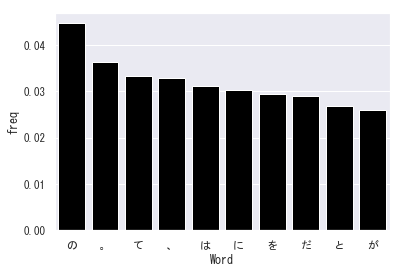

In [69]:
sns.set(font='MS Gothic')
sns.barplot(x="Word", y="freq", data=df.head(10), color="black")

## 37. 「猫」と共起頻度の高い上位10語

「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [74]:
# All sentence
words = [w["base"] for s in s_s for w in s]
words, counts = np.unique(words, return_counts=True)
df1 = pd.DataFrame({"Word": words, "n": counts, "freq": counts / np.sum(counts)}, index=words)

In [104]:
# Words appeared in sentences including "猫"
words = []
for s in s_s:
    tmp = [w["base"] for w in s]
    if "猫" in tmp: words += tmp
words, counts = np.unique(words, return_counts=True)
df2 = pd.DataFrame({"Word": words, "n_cat": counts, "freq_cat": counts / np.sum(counts)}, index=words)

df = pd.merge(df2, df1, on="Word", how="left")
df = df.sort_values("freq_cat", ascending=False)
df.head()

,Word,n_cat,freq_cat,n,freq
255,の,391,0.053031,9194,0.044647
262,は,272,0.036891,6420,0.031176
3,、,252,0.034179,6772,0.032885
238,に,250,0.033908,6243,0.030317
1153,猫,248,0.033636,248,0.001204


## 38. ヒストグラム

単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

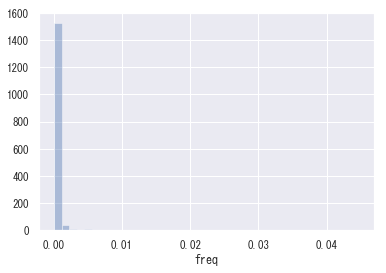

In [98]:
sns.distplot(df.freq, bins=40, kde=False)

## 39. Zipfの法則

単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ

In [112]:
df = df.sort_values("freq", ascending=False)
df.index = range(df.shape[0])
df.head()

,Word,n_cat,freq_cat,n,freq
0,の,391,0.053031,9194,0.044647
1,。,209,0.028347,7486,0.036353
2,て,229,0.031059,6848,0.033255
3,、,252,0.034179,6772,0.032885
4,は,272,0.036891,6420,0.031176


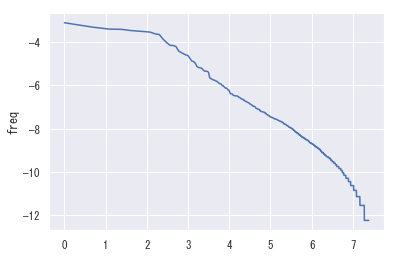

In [113]:
sns.lineplot(x=np.log(df.index+1), y=np.log(df.freq))